In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [2]:
data = pd.read_csv('dataset/stock_data.csv')

In [3]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close,Company Name
0,2010-01-04,93.750000,92.012497,93.562500,92.775002,1632148.0,73.478745,HCL
1,2010-01-05,95.250000,92.637497,93.125000,94.862503,5037896.0,75.132080,HCL
2,2010-01-06,95.724998,91.250000,95.025002,92.000000,3992320.0,72.864944,HCL
3,2010-01-07,92.974998,89.800003,92.974998,90.037498,3665940.0,71.310638,HCL
4,2010-01-08,90.750000,87.312500,90.750000,87.937500,6241492.0,69.647415,HCL
5,2010-01-11,90.375000,87.949997,87.949997,88.812500,5742332.0,70.340424,HCL
6,2010-01-12,93.449997,88.750000,89.250000,91.962502,9051468.0,72.835266,HCL
7,2010-01-13,94.750000,90.025002,91.962502,94.487503,8064504.0,74.835060,HCL
8,2010-01-14,95.937500,91.400002,94.974998,92.525002,7763244.0,73.280762,HCL
9,2010-01-15,93.474998,91.537498,92.875000,92.349998,2749332.0,73.142151,HCL


In [4]:
data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Company Name'],
      dtype='object')

In [5]:
data.drop('Adj Close',axis=1,inplace=True)
data.drop('Date',axis=1,inplace=True)
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Company Name'], dtype='object')

In [6]:
encoder = LabelEncoder()
data['Company Name'] = encoder.fit_transform(data['Company Name'])

In [7]:
data

,High,Low,Open,Close,Volume,Company Name
0,93.750000,92.012497,93.562500,92.775002,1632148.0,0
1,95.250000,92.637497,93.125000,94.862503,5037896.0,0
2,95.724998,91.250000,95.025002,92.000000,3992320.0,0
3,92.974998,89.800003,92.974998,90.037498,3665940.0,0
4,90.750000,87.312500,90.750000,87.937500,6241492.0,0
...,...,...,...,...,...,...
12311,1538.367798,1495.969727,1527.173950,1501.170410,13734705.0,3
12312,1531.681152,1507.015015,1512.661499,1527.867310,8158196.0,3
12313,1533.117554,1513.701660,1531.433594,1529.699951,7902607.0,3
12314,1529.204712,1493.889404,1527.520630,1499.833130,10246683.0,3


In [8]:
data['Company Name'].value_counts()

0    2464
2    2463
4    2463
1    2463
3    2463
Name: Company Name, dtype: int64

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
data['High'] = scaler.fit_transform(np.array(data['High']).reshape(-1,1))
data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1,1))
data['Open'] = scaler.fit_transform(np.array(data['Open']).reshape(-1,1))
data['Low'] = scaler.fit_transform(np.array(data['Low']).reshape(-1,1))
data['Volume'] = scaler.fit_transform(np.array(data['Volume']).reshape(-1,1))


In [10]:
data

,High,Low,Open,Close,Volume,Company Name
0,0.005439,0.008407,0.009323,0.006761,0.007373,0
1,0.006428,0.008823,0.009035,0.008142,0.022758,0
2,0.006741,0.007899,0.010285,0.006249,0.018034,0
3,0.004928,0.006934,0.008937,0.004951,0.016560,0
4,0.003461,0.005277,0.007473,0.003562,0.028195,0
...,...,...,...,...,...,...
12311,0.957812,0.943303,0.952211,0.938066,0.062044,3
12312,0.953404,0.950658,0.942666,0.955719,0.036853,3
12313,0.954351,0.955111,0.955012,0.956931,0.035698,3
12314,0.951771,0.941918,0.952439,0.937181,0.046287,3


In [11]:
X = data.drop('Close', axis=1)
y = data.Close

In [12]:
print(X.shape)
print(y.shape)

(12316, 5)
(12316,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9237, 5)
(9237,)
(3079, 5)
(3079,)


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.score(X_train, y_train)

0.9998527149125346

In [18]:
y_pred = model.predict(X_test)

In [19]:
model.score(X_test, y_test)

0.9998812525193767

In [20]:
model.coef_

array([ 8.51304667e-01,  6.92522005e-01, -5.50184413e-01, -3.73138837e-03,
       -9.03849538e-05])

In [21]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: %2f'% mean_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.00
Mean Absolute Error: 0.001347
Coefficient of determination: 1.00


Text(0, 0.5, 'Y Predict')

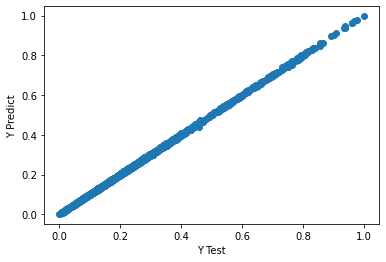

In [22]:
plt.scatter(x = y_test, y = y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predict')

In [23]:
model2 = RandomForestRegressor()

In [24]:
model2.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
model.score(X_train, y_train)

0.9998527149125346

In [26]:
y_pred = model2.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.9998812525193767

In [28]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: %2f'% mean_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.00
Mean Absolute Error: 0.001639
Coefficient of determination: 1.00


Text(0, 0.5, 'Y Predict')

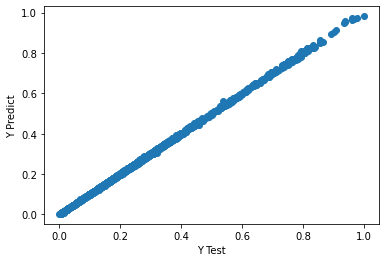

In [29]:
plt.scatter(x = y_test, y = y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predict')

In [30]:
with open('model/model.pickle', 'wb') as file:
      pickle.dump(model, file)